Total issues scraped: 500
Top 5 Labels:
activerecord     147
railties          94
docs              93
actionpack        40
activesupport     34
Name: count, dtype: int64


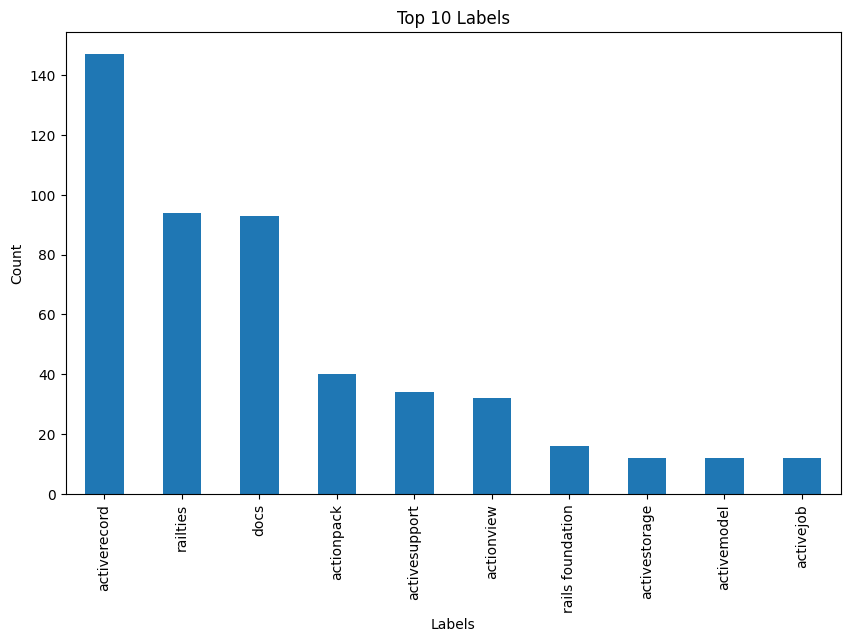

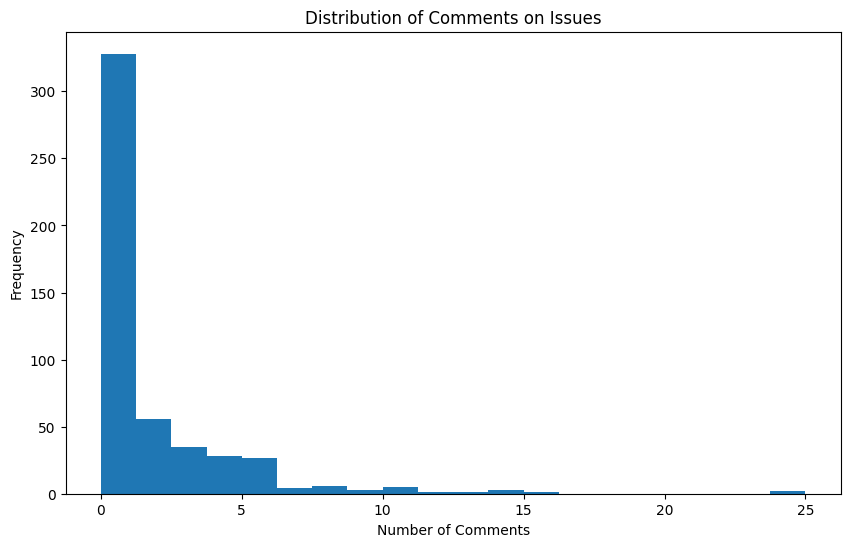

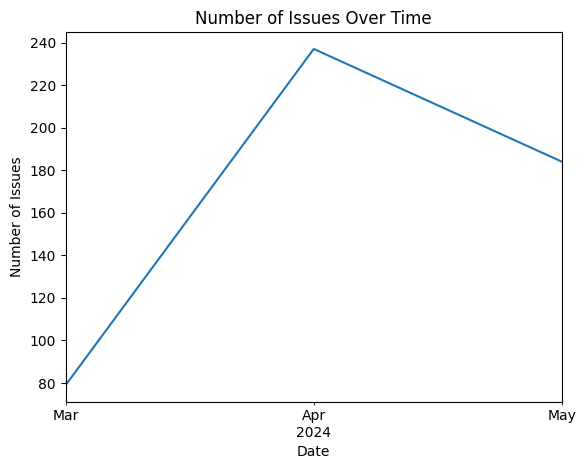

Periods with the most issues:
created_at
2024-04-30 00:00:00+00:00    237
2024-05-31 00:00:00+00:00    184
2024-03-31 00:00:00+00:00     79
dtype: int64


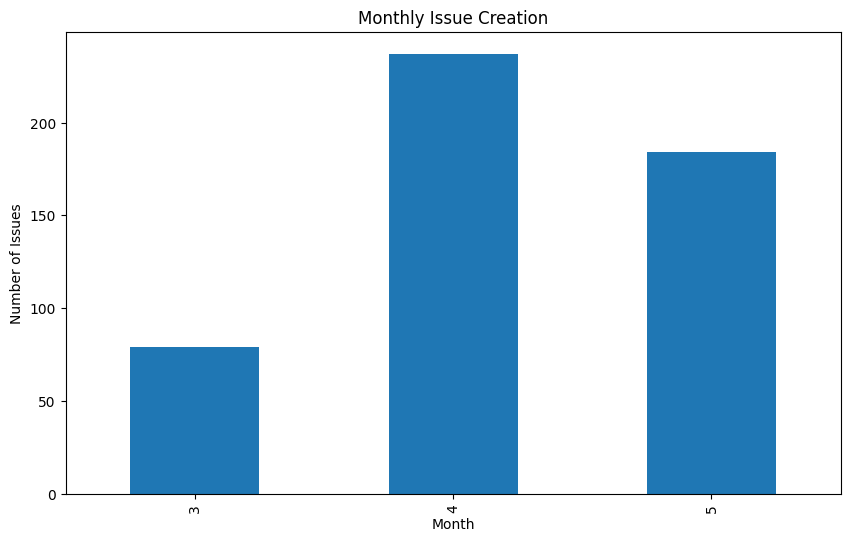

Top Reporters:
reporter
casperisfine      28
fatkodima         24
andrewn617        21
Earlopain         13
akhilgkrishnan    12
Name: count, dtype: int64
Most Popular Label:
[('activerecord', 147)]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Classified Issues with Metrics:
Title: chore: remove webpack from yarn dependencies in Rails dev
Predicted Label: activestorage
Confidence Score: 0.18
Precision: 1.00
Recall: 0.00
F1 Score: 0.00
--------------------------------------------------
Title: Guides: Explain reset_column_information in Chapter "Migrations and Seed Data"
Predicted Label: docs
Confidence Score: 0.17
Precision: 1.00
Recall: 0.00
F1 Score: 0.00
--------------------------------------------------
Title: `ActiveSupport::BroadcastLogger` with `ActiveSupport::TaggedLogging`  throws  `no implicit conversion of String into Integer (TypeError)`
Predicted Label: activesupport
Confidence Score: 0.11
Precision: 1.00
Recall: 0.00
F1 Score: 0.00
--------------------------------------------------
Title: `ActiveStorage::Attachment` - Unhandled case where `named_variants` can be `nil`
Predicted Label: activestorage
Confidence Score: 0.09
Precision: 1.00
Recall: 0.00
F1 Score: 0.00
------------------------------------------------

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

# Fetch issues from GitHub API
def fetch_issues(repo='rails/rails', state='all', per_page=100, max_pages=5):
    issues = []
    url = f"https://api.github.com/repos/{repo}/issues"
    params = {"state": state, "per_page": per_page}
    headers = {"Accept": "application/vnd.github.v3+json"}

    for page in range(1, max_pages + 1):
        response = requests.get(url, params={**params, "page": page}, headers=headers)
        if response.status_code == 200:
            issues.extend(response.json())
        else:
            print(f"Error fetching issues: {response.status_code}")
            break
    return issues

# Parse fetched issues
def parse_issues(issues):
    parsed_issues = [
        {
            "number": issue["number"],
            "title": issue["title"],
            "created_at": issue["created_at"],
            "comments": issue["comments"],
            "labels": [label["name"] for label in issue.get("labels", [])],
            "reporter": issue["user"]["login"] if "user" in issue else "Unknown",
        }
        for issue in issues
    ]
    return parsed_issues

# Perform exploratory data analysis (EDA)
def perform_eda(df):
    print(f"Total issues scraped: {len(df)}")

    # Visualize top labels
    all_labels = [label for labels in df['labels'] for label in labels]
    if all_labels:
        label_counts = pd.Series(all_labels).value_counts()
        print("Top 5 Labels:")
        print(label_counts.head(5))
        label_counts.head(10).plot(kind='bar', figsize=(10, 6))
        plt.title('Top 10 Labels')
        plt.xlabel('Labels')
        plt.ylabel('Count')
        plt.show()

    # Visualize distribution of comments
    if 'comments' in df.columns:
        df['comments'].plot(kind='hist', bins=20, figsize=(10, 6))
        plt.title('Distribution of Comments on Issues')
        plt.xlabel('Number of Comments')
        plt.ylabel('Frequency')
        plt.show()

    # Visualize issue creation over time
    issue_over_time = df.resample('M').size()
    issue_over_time.plot()
    plt.title('Number of Issues Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Issues')
    plt.show()

    # Periods with the most issues
    print("Periods with the most issues:")
    print(issue_over_time.sort_values(ascending=False).head())

    # Visualize monthly issue creation
    monthly_counts = df.index.month.value_counts().sort_index()
    monthly_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Monthly Issue Creation')
    plt.xlabel('Month')
    plt.ylabel('Number of Issues')
    plt.show()

    # Identify top reporters
    if 'reporter' in df.columns:
        top_reporters = df['reporter'].value_counts().head(5)
        print("Top Reporters:")
        print(top_reporters)

    # Most popular category (label)
    if all_labels:
        label_counts = Counter(all_labels)
        most_popular_label = label_counts.most_common(1)
        print("Most Popular Label:")
        print(most_popular_label)

# Classify issues and calculate metrics using zero-shot classification
def classify_and_calculate_metrics(issues, candidate_labels):
    classifier = pipeline("zero-shot-classification", model="cross-encoder/nli-distilroberta-base")
    descriptions = [issue['title'] for issue in issues]
    classifications = classifier(descriptions, candidate_labels=candidate_labels)

    true_labels = []
    predicted_labels = []
    metrics = []

    for i, classification in enumerate(classifications):
        true_label = issues[i]['labels'][0] if issues[i]['labels'] else 'None'
        predicted_label = classification['labels'][0]

        true_labels.append(true_label)
        predicted_labels.append(predicted_label)

         #Precision measures the accuracy of the predicted labels.
         #In other words, it tells us how many of the issues that the model labeled as a specific category are actually correct.
         #High precision means that the model makes few mistakes in its predictions

         #Recall measures the model's ability to identify all relevant issues.
         #It tells us how many of the actual issues of a specific category the model successfully identified.
         #High recall means that the model is good at finding most of the relevant issues

         #The F1 score is the harmonic mean of precision and recall.
         #It provides a single metric that balances both precision and recall.
         #A high F1 score indicates that the model is performing well in terms of both precision and recall.


        precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
        recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
        f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=1)

        metrics.append({
            'title': issues[i]['title'],
            'predicted_label': predicted_label,
            'score': classification['scores'][0],
            'precision': precision,
            'recall': recall,
            'f1': f1
        })

    return metrics

# Main function
def main():
    issues = fetch_issues()
    parsed_issues = parse_issues(issues)
    df = pd.DataFrame(parsed_issues)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    perform_eda(df)

    candidate_labels = list(set([label for labels in df['labels'] for label in labels]))
    classified_issues_with_metrics = classify_and_calculate_metrics(parsed_issues, candidate_labels)

    print("Classified Issues with Metrics:")
    for issue in classified_issues_with_metrics[:10]:  # Display only first 10 for brevity
        print(f"Title: {issue['title']}")
        print(f"Predicted Label: {issue['predicted_label']}")
        print(f"Confidence Score: {issue['score']:.2f}")
        print(f"Precision: {issue['precision']:.2f}")
        print(f"Recall: {issue['recall']:.2f}")
        print(f"F1 Score: {issue['f1']:.2f}")
        print("-" * 50)

if __name__ == "__main__":
    main()
